In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline
import os
from datetime import timedelta, datetime
import statistics 

In [2]:
price = 24.63
y = 0.0823
std = 0.1760
inter = 0.25
divyield = 0.0028

In [3]:
sim = pd.DataFrame(index=np.arange(19),columns=list(np.arange(10001)))
sim.loc[0] = [24.63]*10001

for j in range(0,10001):
    for i in range(1,19):
        sim.loc[i][j] = (sim.loc[i-1][j]*np.exp((y-((std**2)/2))*inter+std*norm.ppf(random.uniform(0, 1))*math.sqrt(inter)))*(1-divyield)

In [4]:
date = ["Q2-'90","Q3-'90","Q4-'90",
         "Q1-'91","Q2-'91","Q3-'91","Q4-'91",
         "Q1-'92","Q2-'92","Q3-'92","Q4-'92",
         "Q1-'93","Q2-'93","Q3-'93","Q4-'93",
         "Q1-'94","Q2-'94","Q3-'94","Q4-'94"]

In [5]:
mean_sim = []
for i in range(19):
    mean_sim.append(sim.iloc[i,:].mean())

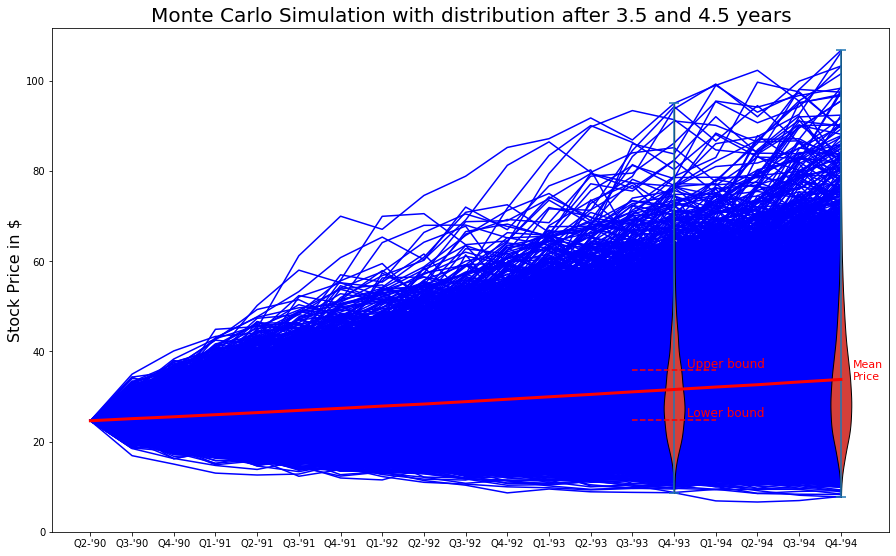

In [6]:
fig,ax = plt.subplots(figsize= (15,15*0.618))
v1 = plt.violinplot(sim.loc[[14,18],:].values.tolist(),positions=[14,18]);
for pc in v1['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
plt.plot(range(19),mean_sim, zorder=10, c = "r",linewidth=3)
plt.text(18.3,mean_sim[18],"Mean\nPrice", color = "r",fontsize=11)
plt.plot(sim.iloc[:,0:10001], c = "blue",zorder=0)
plt.xticks(ticks=sim.index, labels=date)
plt.ylim(ymin=0)
plt.ylabel('Stock Price in $',fontsize=16)
plt.title("Monte Carlo Simulation with distribution after 3.5 and 4.5 years",
         fontsize=20);
plt.hlines(24.9,13,15,colors = "red", linestyle = "dashed");
plt.text(14.3, 25.5, "Lower bound", color = "red",fontsize=12)
plt.hlines(35.8,13,15,colors = "red", linestyle = "dashed");
plt.text(14.3, 36.4, "Upper bound", color = "red", fontsize=12)
plt.savefig('MonteCarlo.png');

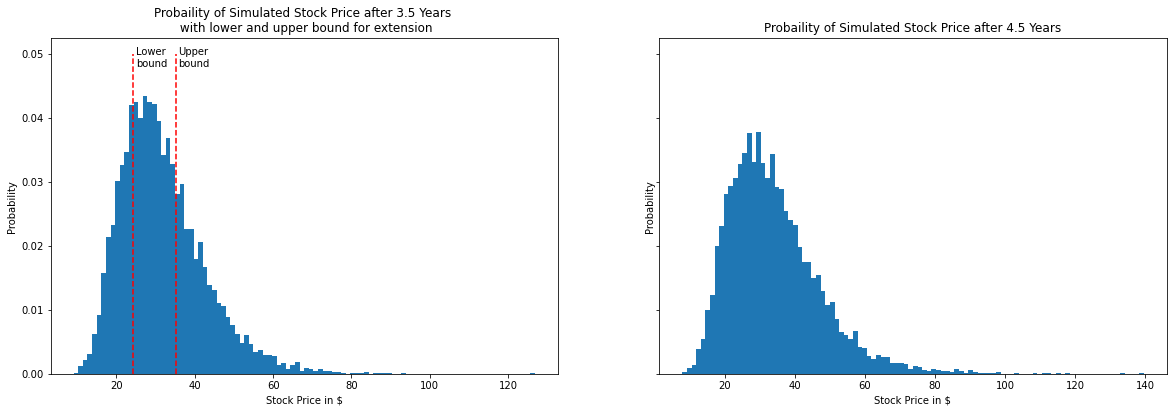

In [23]:
fig,sp = plt.subplots(1,2,figsize= (20,10*0.618),sharey=True)
sp[0].hist(sim.loc[14], density=True, bins=100) 
sp[0].vlines([24.25,35.21],0,0.05, colors = "r", linestyle = "dashed")
sp[0].text(24.9, 0.048, "Lower\nbound")
sp[0].text(35.8, 0.048, "Upper\nbound")
sp[0].set_ylabel('Probability')
sp[0].set_xlabel('Stock Price in $');
sp[0].set_title("Probaility of Simulated Stock Price after 3.5 Years \n with lower and upper bound for extension");

sp[1].hist(sim.loc[18], density=True, bins=100) 
sp[1].set_ylabel('Probability')
sp[1].set_xlabel('Stock Price in $');
sp[1].set_title("Probaility of Simulated Stock Price after 4.5 Years");
plt.savefig('Probability.png');

In [24]:
K_3 = 49.13
K_4 = 53.06

In [27]:
CVR_3 = pd.DataFrame(index=np.arange(1),columns=list(np.arange(10001)))
for i in range(0,10001):
    CVR_3[i] = max(min(K_3-sim.loc[14][i],K_3-26),0)
    
CVR_4 = pd.DataFrame(index=np.arange(1),columns=list(np.arange(10001)))
for i in range(0,10001):
    CVR_4[i] = max(min(K_4-sim.loc[18][i],K_4-26),0)
    
CVR_time = pd.DataFrame(index=np.arange(1),columns=list(np.arange(10001)))
for i in range(0,10001):
    CVR_time[i] = CVR_3[i]/(1+(((1+y)**4/(1+0.082)**3)-1))


In [28]:
CVR_Value = pd.DataFrame(index=np.arange(1),columns=list(np.arange(10001)))
for i in range(0,10001):
    CVR_Value[i] = max(CVR_3.loc[0][i],CVR_time.loc[0][i])/((1+0.082)**3.5)

In [29]:
CVR_av = sum(CVR_Value.loc[0]) / len(CVR_Value.loc[0])
print(CVR_av)

12.424933896189664


In [30]:
Share_P_plus_CVR = CVR_av + price
print(Share_P_plus_CVR)

37.05493389618967


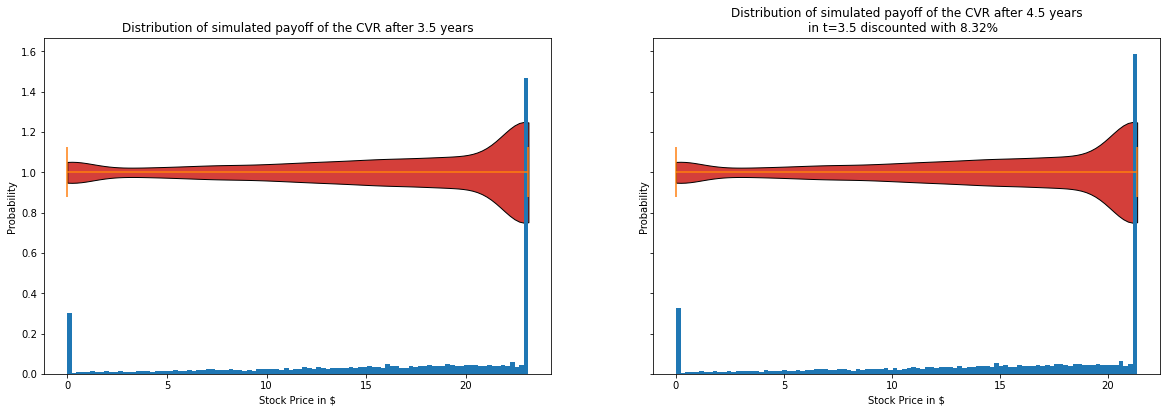

In [31]:
fig,sp = plt.subplots(1,2,figsize= (20,10*0.618),sharey=True)
sp[0].hist(CVR_3.iloc[0], density=True, bins=100) 
sp[0].set_ylabel('Probability')
sp[0].set_xlabel('Stock Price in $');
sp[0].set_title("Distribution of simulated payoff of the CVR after 3.5 years");
v1 = sp[0].violinplot(CVR_3.iloc[0].values.tolist(), vert = False);
for pc in v1['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(1)

sp[1].hist(CVR_time.iloc[0], density=True, bins=100) 
sp[1].set_ylabel('Probability')
sp[1].set_xlabel('Stock Price in $');
sp[1].set_title("Distribution of simulated payoff of the CVR after 4.5 years\nin t=3.5 discounted with 8.32%  ");
v2 = sp[1].violinplot(CVR_time.iloc[0].values.tolist(), vert = False);
for pc in v2['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
plt.savefig('CVR_3&4.png');

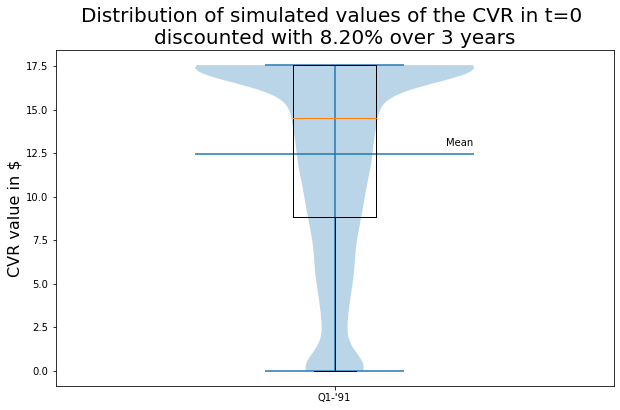

In [36]:
fig,ax = plt.subplots(figsize= (10,10*0.618))
plt.violinplot(CVR_Value.iloc[0].values.tolist());
plt.boxplot(CVR_Value.iloc[0].values.tolist());
plt.hlines(CVR_av,0.75,1.25);
plt.text(1.2, CVR_av+0.5, "Mean");
plt.title("Distribution of simulated values of the CVR in t=0 \ndiscounted with 8.20% over 3 years", fontsize=20);
plt.ylabel('CVR value in $',fontsize=16)
plt.xticks(ticks=[1], labels=["Q1-'91"])
plt.savefig('CVR_Value.png');